# multiclass-prediction 

In [1707]:

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import sklearn
import keras
from tensorflow.keras.optimizers.legacy import Adam
from scikeras.wrappers import KerasRegressor
from keras.layers import Dropout
from keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import tensorflow as tf
import torch
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [1708]:
df_syn = pd.read_csv('synthetic_data.csv')

In [1709]:
df_syn.columns

Index(['Unnamed: 0', 'Kassenr', 'Anteroposterior 1', 'Anteroposterior 2',
       'Vertical 1', 'Vertical 2', 'Transverse', 'Crowding ', 'Spacing',
       'Tooth shape/size\r\n', 'Pan 1', 'Pan 2\r\n', 'Anteroposterior 1.1',
       'Anteroposterior', 'Vertical 1.1', 'Vertical 2.1', 'Transverse.1',
       'Crowding .1', 'Spacing.1', 'Tooth shape/size\r\n.1', 'Pan 1.1',
       'Pan 2\r\n.1', 'Anteroposterior 1.2', 'Anteroposterior 2.1',
       'Vertical 1.2', 'Vertical 2.2', 'Transverse.2', 'Crowding .2',
       'Spacing.2', 'Tooth shape/size\r\n.2', 'Pan 1.2', 'Pan 2\r\n.2',
       'Total Row Score A', 'Total Row Score B', 'Total Row Score C'],
      dtype='object')

In [1710]:
df = pd.read_csv('Data for python.csv', sep=';', header=1, index_col=0, decimal=',')
df
df = df.fillna(0)
df = df.drop(columns=['Id'])
df = df.drop(columns=['ScandcleftID'])
df = df.drop(columns=['Født'])
df = df.drop(columns=['Materialedato A'])
df = df.drop(columns=['Materialedato B'])
df = df.drop(columns=['Materialedato C'])


In [1711]:
def pin_update(row):
    if row["Total Row Score C"] <= 5:
        return 1
    else:
        return 0

In [1712]:
def pin_update1(row):
     if 5 < row["Total Row Score C"] <= 9:
          return 1
     else:
          return 0 

In [1713]:
def pin_update2(row):
    if row["Total Row Score C"] > 9:
        return 1
    return 0 

In [1714]:

#  # create model
# model = Sequential()
# model.add(Dense(32, input_dim=19, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(8,activation='relu'))
# model.add(Dense(3, activation='softmax'))
#  # Compile model
# model.compile(loss='categorical_crossentropy' , optimizer='adam', metrics=['accuracy'])


In [1715]:
def total_row_score(vector):
    vector[7] = sum(vector[0:7])
    vector[15] = sum(vector[8:15])
    print(vector)

In [1716]:
def predic_func(pred):
    if pred[0] > pred[1] and pred[0] > pred[2]:
        return f"the estimate would be class 1 with a probability of {pred[0]*100}"
    elif pred[1] > pred[0] and pred[1] > pred[2]:
        return f"The estimate would be class 2 with a probability of {pred[1]*100}"
    else:
        return f"the estimate would be class 3 with a probability of {pred[2]*100}"

In [1717]:
Output = df.apply(pin_update, axis=1)
Output1 = df.apply(pin_update1, axis=1)
Output2 = df.apply(pin_update2, axis=1)
df['Output'] = Output
df['Output1'] = Output1
df['Output2']  = Output2
df

,Kassenr,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Crowding,Spacing,Tooth shape/size\r\n,Pan 1,...,Crowding .2,Spacing.2,Tooth shape/size\r\n.2,Pan 1.2,Pan 2\r\n.2,Total Row Score C,Goslon Score C,Output,Output1,Output2
Center,,,,,,,,,,,,,,,,,,,,,
H,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,1,0,0
H,2,9.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1.0,1,0,0
H,3,9.0,0.0,0.0,0.0,6.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8,1.0,0,1,0
H,4,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9,1.0,0,1,0
H,5,9.0,0.0,1.0,0.0,6.0,4.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,9,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Å,80,9.0,0.0,1.0,0.0,6.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3,1.0,1,0,0
Å,81,9.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4,3.0,1,0,0
Å,82,12.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12,2.0,0,0,1


In [1718]:
Output = df_syn.apply(pin_update, axis=1)
Output1 = df_syn.apply(pin_update1, axis=1)
Output2 = df_syn.apply(pin_update2, axis=1)
df_syn['Output'] = Output
df_syn['Output1'] = Output1
df_syn['Output2']  = Output2


In [1719]:
df1 = df[["Anteroposterior 1",
          'Anteroposterior 2',
          'Vertical 1',
          'Vertical 2',
          'Transverse',
          'Spacing',
          'Tooth shape/size\r\n',
          "Pan 2\r\n",
          'Total Row Score A',
          'Anteroposterior 1.1',
          'Anteroposterior',
          'Vertical 1.1',
          'Vertical 2.1',
          'Transverse.1',
          'Spacing.1',
          'Tooth shape/size\r\n.1',
          'Pan 2\r\n.1',
          'Total Row Score B',
          'Output',
          'Output1',
          'Output2']]
df1.iloc[1:, :]
df1

,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Spacing,Tooth shape/size\r\n,Pan 2\r\n,Total Row Score A,Anteroposterior 1.1,...,Vertical 1.1,Vertical 2.1,Transverse.1,Spacing.1,Tooth shape/size\r\n.1,Pan 2\r\n.1,Total Row Score B,Output,Output1,Output2
Center,,,,,,,,,,,,,,,,,,,,,
H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
H,9.0,0.0,0.0,0.0,6.0,4.0,0.0,4.0,23,0.0,...,0.0,0.0,6.0,4.0,0.0,3.0,13,1,0,0
H,9.0,0.0,0.0,0.0,6.0,1.0,1.0,3.0,21,9.0,...,2.0,4.0,6.0,0.0,1.0,3.0,25,0,1,0
H,0.0,0.0,0.0,0.0,2.0,1.0,0.0,4.0,10,0.0,...,0.0,0.0,6.0,3.0,0.0,0.0,10,0,1,0
H,9.0,0.0,1.0,0.0,6.0,0.0,1.0,4.0,25,9.0,...,2.0,0.0,6.0,0.0,1.0,4.0,26,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Å,9.0,0.0,1.0,0.0,6.0,3.0,0.0,4.0,23,9.0,...,0.0,0.0,6.0,3.0,0.0,3.0,21,1,0,0
Å,9.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,21,12.0,...,3.0,4.0,6.0,0.0,0.0,3.0,32,1,0,0
Å,12.0,0.0,0.0,0.0,6.0,0.0,0.0,4.0,25,9.0,...,0.0,0.0,6.0,0.0,0.0,4.0,23,0,0,1


In [1720]:
df1_syn = df_syn[["Anteroposterior 1",
          'Anteroposterior 2',
          'Vertical 1',
          'Vertical 2',
          'Transverse',
          'Spacing',
          'Tooth shape/size\r\n',
          "Pan 2\r\n",
          'Total Row Score A',
          'Anteroposterior 1.1',
          'Anteroposterior',
          'Vertical 1.1',
          'Vertical 2.1',
          'Transverse.1',
          'Spacing.1',
          'Tooth shape/size\r\n.1',
          'Pan 2\r\n.1',
          'Total Row Score B',
          'Output',
          'Output1',
          'Output2']]
df1_syn.iloc[1:, :]



,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Spacing,Tooth shape/size\r\n,Pan 2\r\n,Total Row Score A,Anteroposterior 1.1,...,Vertical 1.1,Vertical 2.1,Transverse.1,Spacing.1,Tooth shape/size\r\n.1,Pan 2\r\n.1,Total Row Score B,Output,Output1,Output2
1,12.0,0.0,0.0,4.0,6.0,0.0,0.0,4.0,30.0,12.0,...,0.0,0.0,0.0,0.0,0.0,4.0,19.0,1,0,0
2,12.0,0.0,0.0,0.0,6.0,0.0,0.0,4.0,25.0,0.0,...,0.0,4.0,6.0,3.0,0.0,4.0,17.0,1,0,0
3,12.0,0.0,0.0,0.0,6.0,0.0,0.0,4.0,24.0,0.0,...,2.0,0.0,8.0,0.0,0.0,3.0,15.0,0,1,0
4,12.0,0.0,3.0,0.0,6.0,0.0,1.0,4.0,26.0,9.0,...,0.0,1.0,6.0,0.0,0.0,4.0,24.0,1,0,0
5,12.0,0.0,0.0,3.0,8.0,0.0,0.0,4.0,27.0,0.0,...,0.0,0.0,6.0,0.0,1.0,3.0,14.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17805,12.0,0.0,2.0,0.0,6.0,0.0,1.0,4.0,29.0,12.0,...,1.0,0.0,6.0,0.0,0.0,4.0,26.0,1,0,0
17806,12.0,0.0,2.0,0.0,6.0,0.0,1.0,4.0,28.0,12.0,...,0.0,0.0,6.0,0.0,1.0,3.0,25.0,0,1,0
17807,12.0,0.0,2.0,0.0,6.0,0.0,0.0,4.0,28.0,12.0,...,0.0,4.0,6.0,0.0,0.0,0.0,25.0,1,0,0
17808,12.0,0.0,2.0,0.0,6.0,0.0,1.0,4.0,26.0,0.0,...,0.0,4.0,6.0,0.0,0.0,4.0,17.0,1,0,0


In [1721]:


target_column = ["Output",'Output1','Output2']
numerical_column = df1.columns.drop(target_column)
output_rows = df1[target_column]
df1.drop(target_column,axis=1,inplace=True)

scaler = MinMaxScaler()
scaler.fit(df1)
df1 = scaler.transform(df1)

/var/folders/d5/qsvd0xbs3610vyxc_s5y8cv80000gn/T/ipykernel_67858/2750786257.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(target_column,axis=1,inplace=True)


In [1722]:

target_column = ["Output",'Output1','Output2']
numerical_column = df1_syn.columns.drop(target_column)
output_rows_syn = df1_syn[target_column]
df1_syn.drop(target_column,axis=1,inplace=True)

scaler = MinMaxScaler()
scaler.fit(df1_syn)
df1_syn = scaler.transform(df1_syn)

/var/folders/d5/qsvd0xbs3610vyxc_s5y8cv80000gn/T/ipykernel_67858/3861707241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_syn.drop(target_column,axis=1,inplace=True)


In [1723]:
X_train, X_test, y_train, y_test = train_test_split(df1, output_rows, test_size=0.25,shuffle=True)
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(df1_syn, output_rows_syn, test_size=0.25,shuffle=True)


In [1724]:
no_classes= 3
no_epochs = 10
optimizer = Adam()
verbosity = 1
num_folds = 5
batch_size = 128
acc_per_fold = []
loss_per_fold = []
fold_no = 1

In [1725]:
inputs = np.concatenate((X_train_syn, X_test_syn), axis=0)
targets = np.concatenate((y_train_syn, y_test_syn), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)

In [1726]:
for train, test in kfold.split(inputs, targets):
    model = Sequential()
    model.add(Dense(128, input_dim=18, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(16,activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(8,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
 # Compile model
    model.compile(loss='categorical_crossentropy' , optimizer='adam', metrics=['accuracy'])

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] *100)
    loss_per_fold.append(scores[0])

  # Increase fold number
    fold_no = fold_no + 1
    

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10


112/112 [==============================] - 23s 133ms/step - loss: 4.7265 - accuracy: 0.3864
Epoch 2/10
112/112 [==============================] - 11s 98ms/step - loss: 7.7206 - accuracy: 0.3827
Epoch 3/10
112/112 [==============================] - 10s 92ms/step - loss: 8.0013 - accuracy: 0.3920
Epoch 4/10
112/112 [==============================] - 10s 94ms/step - loss: 4.0628 - accuracy: 0.4119
Epoch 5/10
112/112 [==============================] - 10s 88ms/step - loss: 1.0559 - accuracy: 0.4804
Epoch 6/10
112/112 [==============================] - 10s 92ms/step - loss: 1.0448 - accuracy: 0.4829
Epoch 7/10
112/112 [==============================] - 10s 91ms/step - loss: 1.0462 - accuracy: 0.4837
Epoch 8/10
112/112 [==============================] - 10s 91ms/step - loss: 1.0349 - accuracy: 0.4853
Epoch 9/10
112/112 [==============================] - 10s 92ms/step - loss: 1.0371 - accuracy: 0.4890
Epoch 10/10
112/112 [==============================] - 10s 92ms/step - loss: 1.0354 - accura

In [1727]:
y_test.Output
tensor = torch.tensor(y_test.values)
tensor.shape
predicted = model.predict(X_test)

1/1 [==============================] - 0s 200ms/step


tf.Tensor(
[[0.4785668  0.326856   0.1945772 ]
 [0.47790754 0.3273181  0.19477428]
 [0.4736265  0.32921132 0.19716215]
 [0.4576385  0.33709344 0.20526804]
 [0.47312018 0.3295372  0.19734265]
 [0.46533215 0.333445   0.20122285]
 [0.46903157 0.33157384 0.19939457]
 [0.4690358  0.33150873 0.19945551]
 [0.47927213 0.3267208  0.1940071 ]
 [0.4723416  0.32993346 0.19772497]
 [0.47694328 0.3276761  0.19538063]
 [0.47654152 0.32797337 0.19548506]
 [0.4752417  0.32856753 0.19619074]
 [0.46670198 0.3327688  0.20052922]
 [0.47322983 0.32952496 0.19724527]
 [0.48393363 0.32455048 0.19151583]
 [0.47105047 0.33042306 0.19852646]
 [0.46811658 0.33192962 0.19995384]
 [0.4756767  0.32830265 0.19602062]
 [0.4714536  0.33016634 0.19838008]
 [0.47385716 0.32927623 0.19686663]
 [0.46718955 0.33267385 0.20013659]
 [0.47643715 0.32785463 0.1957082 ]
 [0.46847802 0.33186832 0.1996537 ]
 [0.4729815  0.32957342 0.19744508]], shape=(25, 3), dtype=float32)


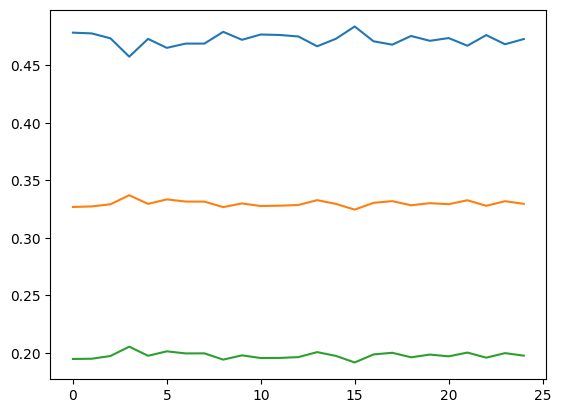

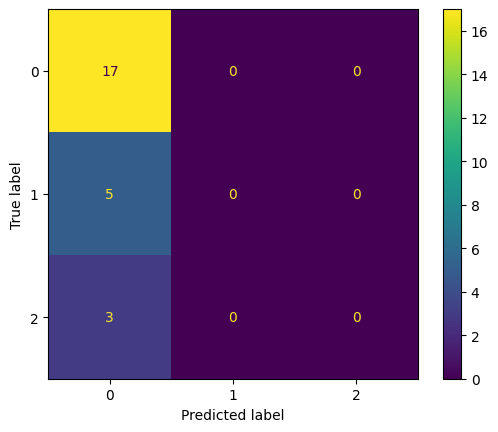

In [1728]:
predict = tf.squeeze(predicted)
plt.plot(predict)
print(predict)
predic= np.array([np.argmax(row) for row in predicted])
actual = np.array([np.argmax(row) for row in tensor])
conf_mat = confusion_matrix(actual, predic)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [1736]:

"Anteroposterior 1",'Anteroposterior 2','Vertical 1','Vertical 2','Transverse','Spacing','Pan 1','Total Row Score A','Goslon Score A'

          
'Anteroposterior 1.1','Anteroposterior 2.1','Vertical 1.1', 'Vertical 2.1', 'Transverse.1', 'Spacing.1', 'Pan 1.1', 'Total Row Score B', 'Goslon Score B'

xnew = np.array([[9, 0, 3, 0, 6,1, 4 ,4, 26],
                 [12, 0, 2, 3, 8,1, 4, 3, 32]])

scaler.fit(xnew)
xnew = scaler.transform(xnew)

#total_row_score(xnew)
xnew

TypeError: MinMaxScaler.transform() got an unexpected keyword argument 'copy'

In [1733]:
new_prediction = model.predict(xnew.reshape(1,18))
new_prediction = tf.squeeze(new_prediction)

print(new_prediction)

1/1 [==============================] - 0s 393ms/step
tf.Tensor([0.8309738  0.12212081 0.04690537], shape=(3,), dtype=float32)


In [1734]:

print(predic_func(new_prediction))

the estimate would be class 1 with a probability of 83.09738159179688
